In [1]:
%%capture
%run part_06_visualization.ipynb

# uncomment subsequent if needed
#!pip install scikit-learn

from sklearn.datasets import load_digits

# **Load and Prep the Data**

In [2]:
digits = load_digits()
features, labels = digits.data.tolist(), digits.target.tolist()
targets = [[float(i == t) for i in range(10)] for t in labels]
split_idx = int(len(features) * 0.8)
t_features, v_features = features[:split_idx], features[split_idx:]
t_targets, v_targets = targets[:split_idx], targets[split_idx:]
t_labels, v_labels =  labels[:split_idx], labels[split_idx:]

# **Explore and Visaulize the Data**

In [3]:
def display_digit(sample):
    reshape_8x8 = lambda xs: [xs[i:i+8] for i in range(0, len(xs), 8)]
    sample_image = reshape_8x8(sample)
    plt.figure(figsize=(3, 3))
    plt.imshow(sample_image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.axis('off')
    plt.show()

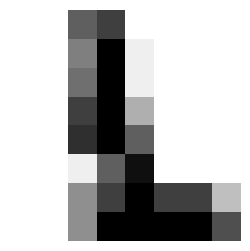


Label: 1
Target: [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Raw Feature Data:
[0.0, 0.0, 10.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 16.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 16.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.0, 16.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 10.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.0, 12.0, 16.0, 12.0, 12.0, 4.0, 0.0, 0.0, 7.0, 16.0, 16.0, 16.0, 16.0, 11.0]


In [4]:
i = random.randint(0, len(features)-1)
display_digit(features[i])
print(f'\nLabel: {labels[i]}')
print(f'Target: {targets[i]}')
print(f'Raw Feature Data:\n{features[i]}')

# **Train and Evaluate**

In [5]:
shape = [64, 8, 8, 8, 10]
neural_network = NeuralNetwork(shape)
t_data = [[tf, tt] for tf, tt in zip(t_features, t_targets)]
v_data = [[vf, vt] for vf, vt in zip(v_features, v_targets)]

In [6]:
print(neural_network.evaluate_error(v_data))
print(neural_network.evaluate_accuracy(v_data))
neural_network.train(t_data, 100, 0.01)
print(neural_network.evaluate_error(v_data))
print(neural_network.evaluate_accuracy(v_data))

0.09973272769866029
0.1527777777777778
Progress: [██████████████████████████████████████████████████] 100%
0.020862139266601427
0.8833333333333333


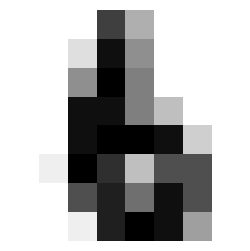


Label: 6
Prediction: 6
Target: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
Output: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.1, 0.0]


In [11]:
i = random.randint(0, len(v_features)-1)
output = neural_network.predict(v_features[i])
display_digit(v_features[i])
print(f'\nLabel: {v_labels[i]}')
print(f'Prediction: {output.index(max(output))}')
print(f'Target: {v_targets[i]}')
print(f'Output: {[round(x, 1) for x in output]}')